источник:
https://refactoring.guru/ru/design-patterns/python

Состояние — это поведенческий паттерн проектирования, который позволяет объектам менять поведение в зависимости от своего состояния.

Извне создаётся впечатление, что изменился класс объекта.

Паттерн Состояние невозможно рассматривать в отрыве от концепции `машины состояний`, также известной как `стейт-машина` или `конечный автомат`.

Основная идея в том, что программа может находиться в одном из нескольких состояний, которые всё время сменяют друг друга.

Набор этих состояний, а также переходов между ними, предопределён и конечен.

Находясь в разных состояниях, программа может по-разному реагировать на одни и те же события, которые происходят с ней.

Машину состояний чаще всего реализуют с помощью множества условных операторов, `if` либо `switch`, которые проверяют текущее состояние объекта и выполняют соответствующее поведение. 

Основная проблема такой машины состояний проявится в том случае, если в Документ добавить ещё десяток состояний.

Каждый метод будет состоять из увесистого условного оператора, перебирающего доступные состояния.

Такой код крайне сложно поддерживать. Малейшее изменение логики переходов заставит вас перепроверять работу всех методов, которые содержат условные операторы машины состояний.

Путаница и нагромождение условий особенно сильно проявляется в старых проектах.

Набор возможных состояний бывает трудно предопределить заранее, поэтому они всё время добавляются в процессе эволюции программы.

Из-за этого решение, которое выглядело простым и эффективным в самом начале разработки, может впоследствии стать проекцией большого макаронного монстра.

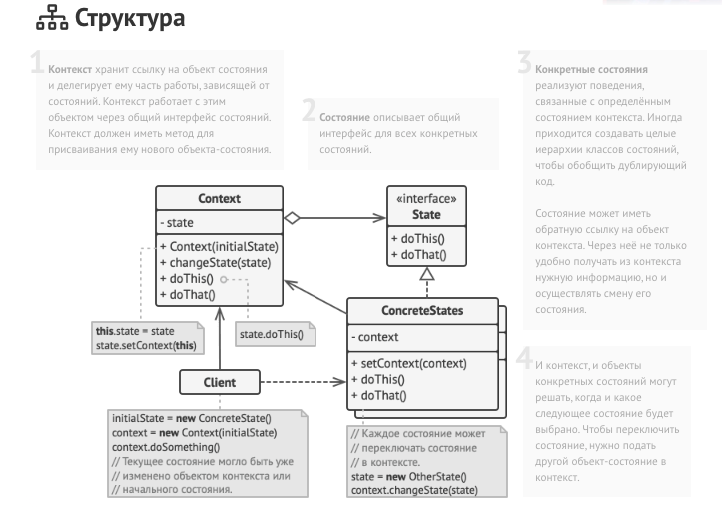

In [5]:
from IPython.display import Image
Image(filename='state_structure_by_refactoringGuru.png', width=900)

## Шаги реализации
1. Определитесь с классом, который будет играть роль контекста. Это может быть как существующий класс, в котором уже есть зависимость от состояния, так и новый класс, если код состояний размазан по нескольким классам.

2. Создайте общий интерфейс состояний. Он должен описывать методы, общие для всех состояний, обнаруженных в контексте. Заметьте, что не всё поведение контекста нужно переносить в состояние, а только то, которое зависит от состояний.

3. Для каждого фактического состояния создайте класс, реализующий интерфейс состояния. Переместите код, связанный с конкретными состояниями в нужные классы. В конце концов, все методы интерфейса состояния должны быть реализованы во всех классах состояний.

При переносе поведения из контекста вы можете столкнуться с тем, что это поведение зависит от приватных полей или методов контекста, к которым нет доступа из объекта состояния. Существует парочка способов обойти эту проблему.

Самый простой — оставить поведение внутри контекста, вызывая его из объекта состояния. С другой стороны, вы можете сделать классы состояний вложенными в класс контекста, и тогда они получат доступ ко всем приватным частям контекста. Но последний способ доступен только в некоторых языках программирования (например, Java, C#).

4. Создайте в контексте поле для хранения объектов-состояний, а также публичный метод для изменения значения этого поля.

5. Старые методы контекста, в которых находился зависимый от состояния код, замените на вызовы соответствующих методов объекта-состояния.

6. В зависимости от бизнес-логики, разместите код, который переключает состояние контекста либо внутри контекста, либо внутри классов конкретных состояний.

In [2]:
from __future__ import annotations
from abc import ABC, abstractmethod


class Context:
    """
    Контекст определяет интерфейс, представляющий интерес для клиентов. Он также
    хранит ссылку на экземпляр подкласса Состояния, который отображает текущее
    состояние Контекста.
    """

    _state = None
    """
    Ссылка на текущее состояние Контекста.
    """

    def __init__(self, state: State) -> None:
        self.transition_to(state)

    def transition_to(self, state: State):
        """
        Контекст позволяет изменять объект Состояния во время выполнения.
        """

        print(f"Context: Transition to {type(state).__name__}")
        self._state = state
        self._state.context = self

    """
    Контекст делегирует часть своего поведения текущему объекту Состояния.
    """

    def request1(self):
        self._state.handle1()

    def request2(self):
        self._state.handle2()


class State(ABC):
    """
    Базовый класс Состояния объявляет методы, которые должны реализовать все
    Конкретные Состояния, а также предоставляет обратную ссылку на объект
    Контекст, связанный с Состоянием. Эта обратная ссылка может использоваться
    Состояниями для передачи Контекста другому Состоянию.
    """

    @property
    def context(self) -> Context:
        return self._context

    @context.setter
    def context(self, context: Context) -> None:
        self._context = context

    @abstractmethod
    def handle1(self) -> None:
        pass

    @abstractmethod
    def handle2(self) -> None:
        pass


"""
Конкретные Состояния реализуют различные модели поведения, связанные с
состоянием Контекста.
"""


class ConcreteStateA(State):
    def handle1(self) -> None:
        print("ConcreteStateA handles request1.")
        print("ConcreteStateA wants to change the state of the context.")
        self.context.transition_to(ConcreteStateB())

    def handle2(self) -> None:
        print("ConcreteStateA handles request2.")


class ConcreteStateB(State):
    def handle1(self) -> None:
        print("ConcreteStateB handles request1.")

    def handle2(self) -> None:
        print("ConcreteStateB handles request2.")
        print("ConcreteStateB wants to change the state of the context.")
        self.context.transition_to(ConcreteStateA())


if __name__ == "__main__":
    # Клиентский код.

    context = Context(ConcreteStateA())
    context.request1()
    context.request2()

Context: Transition to ConcreteStateA
ConcreteStateA handles request1.
ConcreteStateA wants to change the state of the context.
Context: Transition to ConcreteStateB
ConcreteStateB handles request2.
ConcreteStateB wants to change the state of the context.
Context: Transition to ConcreteStateA
